# Спектр гармонического сигнала

## Цель работы

Необходимо получить графики гармонического сигнала с частотами 1,2,4,8 герц и спектры этих сигналов.

## Код программы

In [1]:
%matplotlib notebook
from cycler import cycler
from numpy import sin, cos, linspace
from scipy.fft import rfft, rfftfreq, irfft, fft
# from scipy import signal
from math import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [8]:
T_RANGE   = 2      # Time range
FS        = 2000   # Sampling freq

def t_step(w):
    """
    Generates a time steps array
    """
    N         = 10 *  FS // w
    TIME_STEP = 1 / FS # Sample time interval
    return linspace(0, (N - 1) * TIME_STEP, N)

def f_step(w):
    """
    Generates a frequency steps array
    """
    N         = 10 * FS // w
    FREQ_STEP = FS / N # Sample freq interval
    return linspace(0, (N - 1) * FREQ_STEP, N)

def signal(_func_):
    def wrapper(A, k, t, w, q):
        t      = t_step(w)
        f      = [_func_(A, k, ti, w, q) for ti in t]
        return (t, f) 
    return wrapper

def spectrum(a, t, f, w):
    N = 10 * FS // w
    
    freq = f_step(w)
    
    ampl = fft(f)
    ampl = abs(ampl) / N
    # Normalization
    freq = freq[0: N // 2 + 1]
    ampl = 2 * freq[0: N // 2 + 1]
    ampl[0] = ampl[0] / 2
    
    return freq, ampl

def restore_decay(x, A, k, a=0):
    y = [dump(xi, A, k) + a for xi in x]
    return (y, [-yi for yi in y])

def display(fig, x, y, color='gray'):
    weight = 1
    if color == 'gray':
        style = 'dashed'
    else:
        style = 'solid'
        
    fig.plot(x, y, color, lw=weight, ls=style)
    fig.grid()

def dump(t, A, k=0):
    return A * exp(-k * t)

<IPython.core.display.Javascript object>


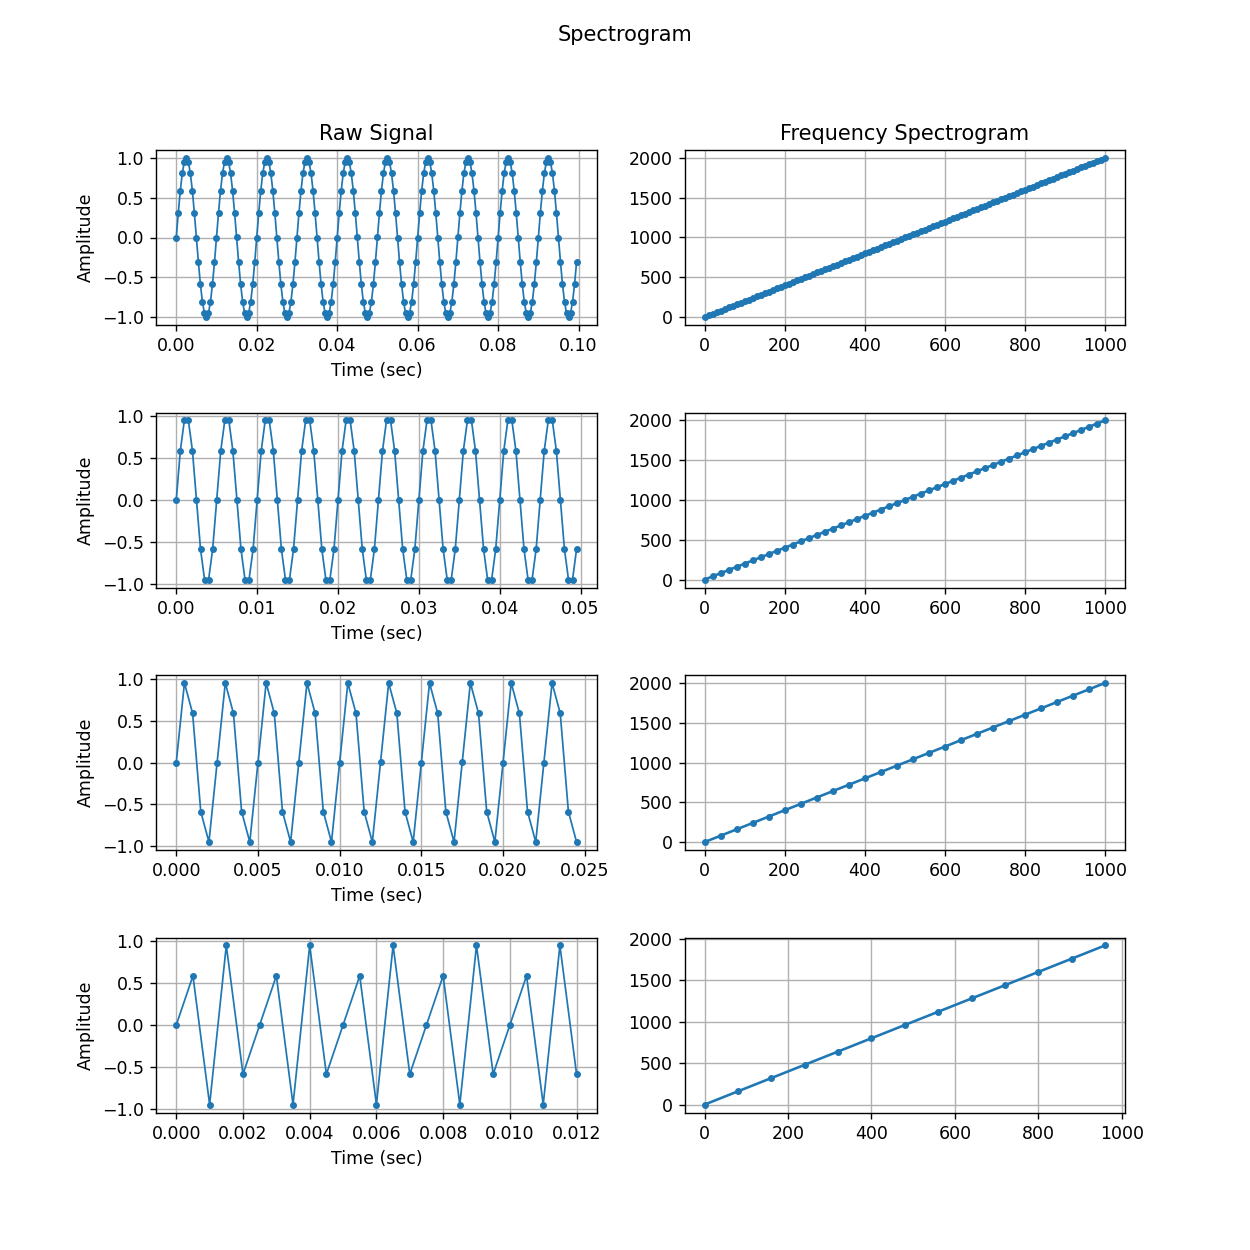

In [9]:
A = 1.0
k = 0.0

@signal
def func(A, k, t, w, q):
    return dump(t, A, k) * sin(2*pi*w * t + q)
    # dump(t, A, k) * (sin(1*w*t) / 1 + sin(3*w*t) / 3 + sin(5*w*t) / 5 + sin(7*w*t) / 7 + sin(9*w*t) / 9)
    
xf1, yf1 = func(1.0, 0.0, None, 100, 0)
xf2, yf2 = func(1.0, 0.0, None, 200, 0)
xf4, yf4 = func(1.0, 0.0, None, 400, 0)
xf8, yf8 = func(1.0, 0.0, None, 800, 0)

xs1, ys1 = spectrum(A, xf1, yf1, 100)
xs2, ys2 = spectrum(A, xf2, yf2, 200)
xs4, ys4 = spectrum(A, xf4, yf4, 400)
xs8, ys8 = spectrum(A, xf8, yf8, 800)


fig, ((afunc1, aspec1), (afunc2, aspec2), (afunc4, aspec4), (afunc8, aspec8)) = plt.subplots(figsize=(10, 10), dpi=100, nrows=4, ncols=2)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Spectrogram')

afunc1.grid()
afunc2.grid()
afunc4.grid()
afunc8.grid()

aspec1.grid()
aspec2.grid()
aspec4.grid()
aspec8.grid()

# Setting column titles
afunc1.set_title('Raw Signal')
aspec1.set_title('Frequency Spectrogram')

# Setting raw signal labels
afunc1.set_ylabel('Amplitude')
afunc2.set_ylabel('Amplitude')
afunc4.set_ylabel('Amplitude')
afunc8.set_ylabel('Amplitude')

afunc1.set_xlabel('Time (sec)')
afunc2.set_xlabel('Time (sec)')
afunc4.set_xlabel('Time (sec)')
afunc8.set_xlabel('Time (sec)')

# Setting spectrum labels
'''
aspec1.set_ylabel('Freq power (W/Hz)')
aspec2.set_ylabel('Freq power (W/Hz)')
aspec4.set_ylabel('Freq power (W/Hz)')
aspec8.set_ylabel('Freq power (W/Hz)')

aspec1.set_xlabel('Harmonic frequency (Hz)')
aspec2.set_xlabel('Harmonic frequency (Hz)')
aspec4.set_xlabel('Harmonic frequency (Hz)')
aspec8.set_xlabel('Harmonic frequency (Hz)')
'''


# Plotting
afunc1.plot(xf1, yf1, '.-', lw=1)
afunc2.plot(xf2, yf2, '.-', lw=1)
afunc4.plot(xf4, yf4, '.-', lw=1)
afunc8.plot(xf8, yf8, '.-', lw=1)

aspec1.plot(xs1, ys1, '.-')
aspec2.plot(xs2, ys2, '.-')
aspec4.plot(xs4, ys4, '.-')
aspec8.plot(xs8, ys8, '.-')